# Text Analytics using NLTK

## Text Analysis Operations using NLTK

In [1]:
import nltk

In [3]:
#nltk.download()
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hossein\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

###  Tokenization


#### Sentence Tokenization
Sentence tokenizer breaks text paragraph into sentences.

In [9]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? 
        The weather is great, and city is awesome.
        The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


#### Word Tokenization
Word tokenizer breaks text paragraph into words.

In [10]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


### Frequency Distribution

In [11]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [12]:
fdist.most_common(2)

[('is', 3), (',', 2)]

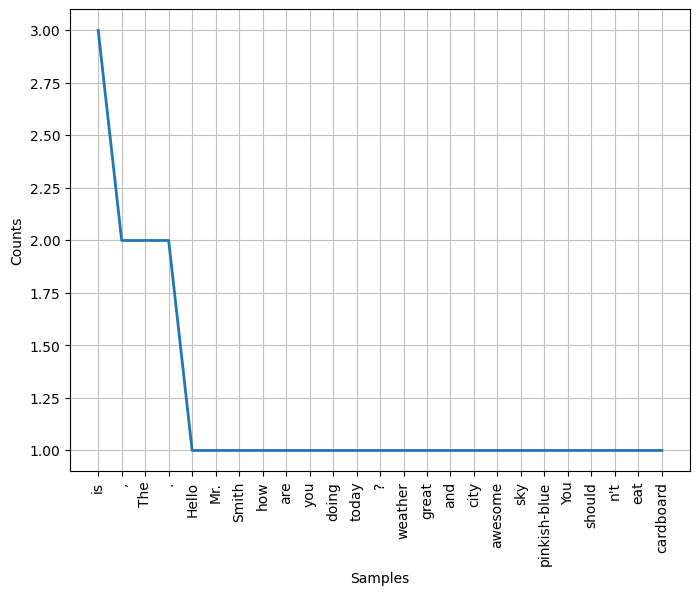

In [8]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
fdist.plot(30,cumulative=False)
plt.show()

### Stopwords
Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc

In [9]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hossein\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
stop_words=stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Removing Stopwords

In [13]:
filtered_word=[]
for w in tokenized_word:
    if w.lower() not in stop_words:
        filtered_word.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_word)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'weather', 'great', ',', 'city', 'awesome', '.', 'sky', 'pinkish-blue', '.', "n't", 'eat', 'cardboard']


In [23]:
import re
pattern = r"[.|,|?|']" 
text2=re.sub(pattern,' ',text)
print(text2)

Hello Mr  Smith  how are you doing today  
        The weather is great  and city is awesome 
        The sky is pinkish-blue  You shouldn t eat cardboard


In [18]:
print(text)

Hello Mr. Smith, how are you doing today? 
        The weather is great, and city is awesome.
        The sky is pinkish-blue. You shouldn't eat cardboard


### Lexicon Normalization
Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

#### Stemming
Stemming is a process of linguistic normalization, which reduces words to their root word or chops off the derivational affixes. For example, connection, connected, connecting word reduce to a common word "connect".

In [24]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_word)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'weather', 'great', ',', 'city', 'awesome', '.', 'sky', 'pinkish-blue', '.', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'weather', 'great', ',', 'citi', 'awesom', '.', 'sky', 'pinkish-blu', '.', "n't", 'eat', 'cardboard']


#### Lemmatization
Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [16]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hossein\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hossein\AppData\Roaming\nltk_data...


True

In [4]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli
